In [1]:
!pip install pandas numpy scikit-learn nltk tensorflow transformers

  Using cached tensorflow-2.19.0-cp312-cp312-win_amd64.whl.metadata (4.1 kB)
  Using cached transformers-4.53.1-py3-none-any.whl.metadata (40 kB)
  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-3.1.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached grpcio-1.73.1-cp312-cp312-win_amd64.whl.metadata (4.0 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached keras-3.10.0-py3-none-any.whl.metadata (6.0 kB)
  Using cached ml_dtypes-0.5.1-cp312-cp312-win_amd64.whl.metadata (22 kB)
  Using cached huggin

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\DELL\\anaconda3\\Lib\\site-packages\\tensorflow\\lite\\experimental\\microfrontend\\python\\ops\\_audio_microfrontend_op.so'
Consider using the `--user` option or check the permissions.




   ---------------------------------------- 3.7/376.0 MB 430.2 kB/s eta 0:14:26
   ---------------------------------------- 3.7/376.0 MB 430.2 kB/s eta 0:14:26
   ---------------------------------------- 3.9/376.0 MB 438.2 kB/s eta 0:14:09
   ---------------------------------------- 3.9/376.0 MB 438.2 kB/s eta 0:14:09
   ---------------------------------------- 4.2/376.0 MB 440.7 kB/s eta 0:14:04
   ---------------------------------------- 4.2/376.0 MB 440.7 kB/s eta 0:14:04
   ---------------------------------------- 4.2/376.0 MB 440.7 kB/s eta 0:14:04
   ---------------------------------------- 4.5/376.0 MB 440.1 kB/s eta 0:14:05
   ---------------------------------------- 4.5/376.0 MB 440.1 kB/s eta 0:14:05
   ---------------------------------------- 4.5/376.0 MB 440.1 kB/s eta 0:14:05
   ---------------------------------------- 4.5/376.0 MB 440.1 kB/s eta 0:14:05
   ---------------------------------------- 4.5/376.0 MB 440.1 kB/s eta 0:14:05
   ------------------------------------

In [3]:
import pandas as pd
import numpy as np
import nltk
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Embedding, Dense
from transformers import BertTokenizer, TFBertForSequenceClassification
import tensorflow as tf

nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

ValueError: Your currently installed version of Keras is Keras 3, but this is not yet supported in Transformers. Please install the backwards-compatible tf-keras package with `pip install tf-keras`.

In [5]:
!pip install tf-keras

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ------------ --------------------------- 0.5/1.7 MB 5.6 MB/s eta 0:00:01
   ------------------------------ --------- 1.3/1.7 MB 4.2 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 3.5 MB/s eta 0:00:00


In [7]:
import pandas as pd
import numpy as np
import nltk
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Embedding, Dense
from transformers import BertTokenizer, TFBertForSequenceClassification
import tensorflow as tf

nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [9]:
df = pd.read_csv('sample_reviews.csv')
df.head()


,review,sentiment
0,The product quality is excellent and delivery ...,1
1,I am very disappointed with the purchase,0
2,Amazing service and user-friendly website,1
3,This is the worst item I have ever bought,0
4,"I love this product, totally worth the money",1


In [11]:
def clean_text(text):
    text = re.sub(r"http\S+", "", text)
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    text = text.lower()
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text

df['cleaned'] = df['review'].apply(clean_text)
X = df['cleaned']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

# Naive Bayes
nb = MultinomialNB()
nb.fit(X_train_vect, y_train)
nb_preds = nb.predict(X_test_vect)
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_preds))

# SVM
svm = LinearSVC()
svm.fit(X_train_vect, y_train)
svm_preds = svm.predict(X_test_vect)
print("SVM Accuracy:", accuracy_score(y_test, svm_preds))


Naive Bayes Accuracy: 1.0
SVM Accuracy: 0.5


In [15]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)
X_train_seq = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=100)
X_test_seq = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=100)

model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=100))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_seq, y_train, validation_data=(X_test_seq, y_test), epochs=3, batch_size=4)


C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/3
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 880ms/step - accuracy: 0.2500 - loss: 0.6976 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/3
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - accuracy: 0.5833 - loss: 0.6863 - val_accuracy: 0.5000 - val_loss: 0.6916
Epoch 3/3
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step - accuracy: 0.5833 - loss: 0.6793 - val_accuracy: 0.5000 - val_loss: 0.6899


In [22]:
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
train_encodings = bert_tokenizer(list(X_train), truncation=True, padding=True, max_length=128, return_tensors="tf")
test_encodings = bert_tokenizer(list(X_test), truncation=True, padding=True, max_length=128, return_tensors="tf")

bert_model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased')
bert_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
                   loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                   metrics=['accuracy'])

bert_model.fit(train_encodings['input_ids'], y_train,
               validation_data=(test_encodings['input_ids'], y_test),
               epochs=2, batch_size=4)


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ValueError: Could not interpret optimizer identifier: <keras.src.optimizers.adam.Adam object at 0x000001F3307CD280>

In [20]:
!pip install hf_xet

   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ----------- ---------------------------- 0.8/2.7 MB 4.8 MB/s eta 0:00:01
   -------------------------- ------------- 1.8/2.7 MB 6.7 MB/s eta 0:00:01
   -------------------------------------- - 2.6/2.7 MB 5.0 MB/s eta 0:00:01
   -------------------------------------- - 2.6/2.7 MB 5.0 MB/s eta 0:00:01
   -------------------------------------- - 2.6/2.7 MB 5.0 MB/s eta 0:00:01
   ---------------------------------------- 2.7/2.7 MB 2.5 MB/s eta 0:00:00


In [24]:
from transformers import create_optimizer

steps_per_epoch = len(X_train) // 4
num_train_steps = steps_per_epoch * 2
optimizer, schedule = create_optimizer(init_lr=2e-5,
                                       num_warmup_steps=0,
                                       num_train_steps=num_train_steps)

bert_model.compile(optimizer=optimizer,
                   loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                   metrics=['accuracy'])


In [26]:
from transformers import BertTokenizer, TFBertForSequenceClassification, create_optimizer
import tensorflow as tf

# Tokenization
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
train_encodings = bert_tokenizer(list(X_train), truncation=True, padding=True, max_length=128, return_tensors="tf")
test_encodings = bert_tokenizer(list(X_test), truncation=True, padding=True, max_length=128, return_tensors="tf")

# Load BERT model
bert_model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased')

# Define training steps and optimizer using transformers' utility
batch_size = 4
epochs = 2
steps_per_epoch = len(X_train) // batch_size
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1 * num_train_steps)

optimizer, lr_schedule = create_optimizer(
    init_lr=2e-5,
    num_warmup_steps=num_warmup_steps,
    num_train_steps=num_train_steps
)

# Compile the model
bert_model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Train the model
bert_model.fit(
    x=train_encodings['input_ids'],
    y=y_train,
    validation_data=(test_encodings['input_ids'], y_test),
    epochs=epochs,
    batch_size=batch_size
)


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/2


2/2 [==============================] - 197s 69s/step - loss: 0.6687 - accuracy: 0.6250 - val_loss: 0.6417 - val_accuracy: 0.5000
Epoch 2/2
2/2 [==============================] - 70s 45s/step - loss: 0.6224 - accuracy: 0.6250 - val_loss: 0.6233 - val_accuracy: 0.5000


In [28]:
import numpy as np

# Get predicted logits
bert_logits = bert_model.predict(test_encodings['input_ids']).logits
bert_preds_binary = np.argmax(bert_logits, axis=1)

# Attach predictions to test DataFrame
df_test = pd.DataFrame({
    'review': list(X_test),
    'true_sentiment': y_test.values,
    'predicted_sentiment': bert_preds_binary
})

# Save to CSV
df_test.to_csv("bert_predictions.csv", index=False)
df_test.head()


1/1 [==============================] - 22s 22s/step


,review,true_sentiment,predicted_sentiment
0,happy packaging speed delivery,1,0
1,disappointed purchase,0,0


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report


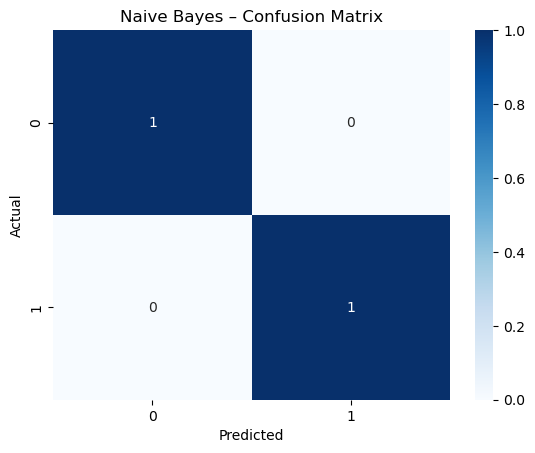

Naive Bayes – Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [32]:
# Naive Bayes Confusion Matrix
nb_cm = confusion_matrix(y_test, nb_preds)
sns.heatmap(nb_cm, annot=True, fmt='d', cmap='Blues')
plt.title("Naive Bayes – Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Naive Bayes Classification Report
print("Naive Bayes – Classification Report")
print(classification_report(y_test, nb_preds))


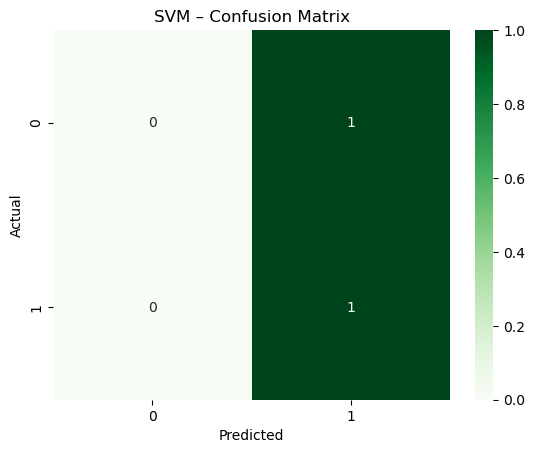

SVM – Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [34]:
# SVM Confusion Matrix
svm_cm = confusion_matrix(y_test, svm_preds)
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Greens')
plt.title("SVM – Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# SVM Classification Report
print("SVM – Classification Report")
print(classification_report(y_test, svm_preds))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


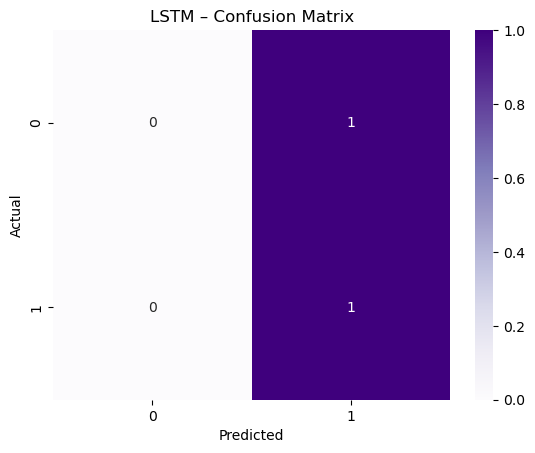

LSTM – Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [36]:
# Predict LSTM outputs
lstm_preds = model.predict(X_test_seq)
lstm_preds_binary = (lstm_preds > 0.5).astype("int32")

# LSTM Confusion Matrix
lstm_cm = confusion_matrix(y_test, lstm_preds_binary)
sns.heatmap(lstm_cm, annot=True, fmt='d', cmap='Purples')
plt.title("LSTM – Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# LSTM Classification Report
print("LSTM – Classification Report")
print(classification_report(y_test, lstm_preds_binary))


1/1 [==============================] - 3s 3s/step


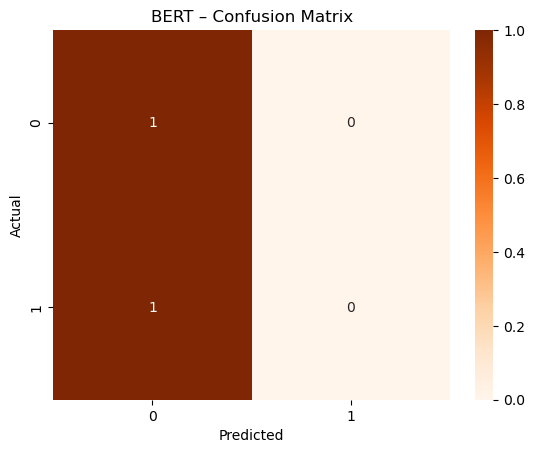

BERT – Classification Report
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [38]:
# Predict with BERT
bert_preds = bert_model.predict(test_encodings['input_ids']).logits
bert_preds_binary = np.argmax(bert_preds, axis=1)

# BERT Confusion Matrix
bert_cm = confusion_matrix(y_test, bert_preds_binary)
sns.heatmap(bert_cm, annot=True, fmt='d', cmap='Oranges')
plt.title("BERT – Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# BERT Classification Report
print("BERT – Classification Report")
print(classification_report(y_test, bert_preds_binary))


C:\Users\DELL\AppData\Local\Temp\ipykernel_4208\66193282.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='coolwarm')


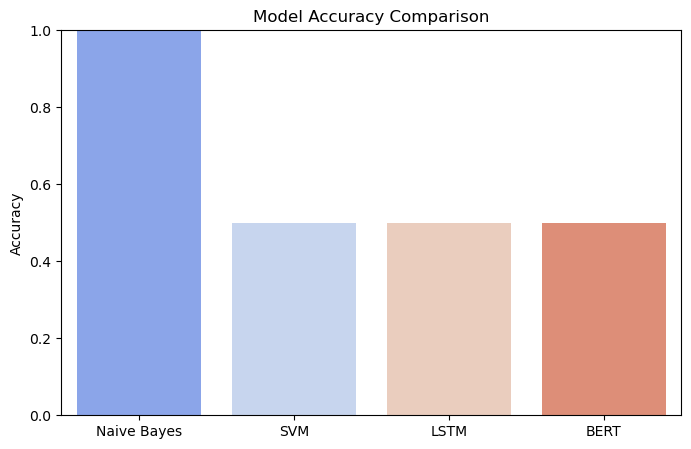

In [40]:
nb_acc = accuracy_score(y_test, nb_preds)
svm_acc = accuracy_score(y_test, svm_preds)
lstm_acc = accuracy_score(y_test, lstm_preds_binary)
bert_acc = accuracy_score(y_test, bert_preds_binary)

# Accuracy comparison
models = ['Naive Bayes', 'SVM', 'LSTM', 'BERT']
accuracies = [nb_acc, svm_acc, lstm_acc, bert_acc]

plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=accuracies, palette='coolwarm')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()
